# Parte 2


## Maria Jose Castro Lemus
## Paula Camila Gonzalez Ortega


In [84]:
#Importamos las librerias necesarias
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
#from quickda.explore_data import *
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.decomposition import PCA

In [85]:
#Leemos el archivo
df = pd.read_csv('Train_data.csv')
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [87]:
df['class'].value_counts()

normal     13449
anomaly    11743
Name: class, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x154ba7c40>,
 'caps': [<matplotlib.lines.Line2D at 0x154bb4220>,
 'boxes': [<matplotlib.lines.Line2D at 0x154b99790>],
 'medians': [<matplotlib.lines.Line2D at 0x154bb47c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x154bb4a90>],
 'means': []}

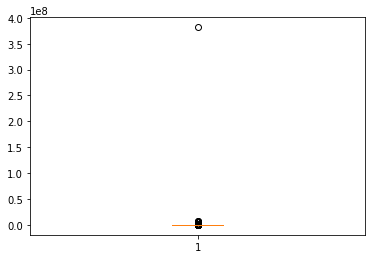

In [88]:
# Graficando
plt.boxplot(df['src_bytes'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1475fa7f0>,
 'caps': [<matplotlib.lines.Line2D at 0x147f58c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x1475fa760>],
 'medians': [<matplotlib.lines.Line2D at 0x147fb5a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x14795c1f0>],
 'means': []}

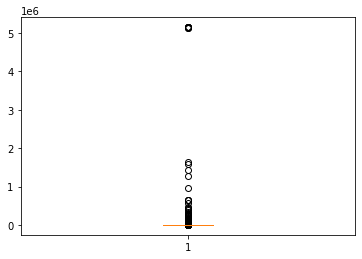

In [89]:
plt.boxplot(df["dst_bytes"])

In [90]:
# El total de registros que tenemos
len(df)

25192

In [91]:
# Aqui vamos a empezar a quitar los outliners
# Definimos la funcion
def remove_outliners(df, feature):
    Q1 = df[feature].quantile(0.0)
    Q3 = df[feature].quantile(0.95)
    IQR = Q3-Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

In [92]:
# Removemos los outliners
upper, lower = remove_outliners(df, "src_bytes")
df = df[(df['src_bytes'] > lower) & (df['src_bytes'] < upper)]

upper, lower = remove_outliners(df, "dst_bytes")
df = df[(df['dst_bytes'] > lower) & (df['dst_bytes'] < upper)]

In [93]:
# El total de registros posterior a remover los atipicos
len(df)

24127

{'whiskers': [<matplotlib.lines.Line2D at 0x154c2a1f0>,
 'caps': [<matplotlib.lines.Line2D at 0x154c2a7c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x154c2a070>],
 'medians': [<matplotlib.lines.Line2D at 0x154c2ad60>],
 'fliers': [<matplotlib.lines.Line2D at 0x154c38070>],
 'means': []}

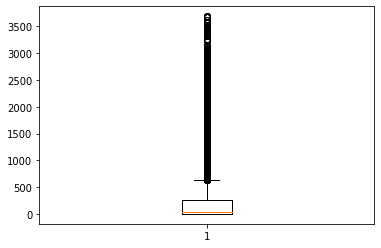

In [94]:
plt.boxplot(df["src_bytes"])

{'whiskers': [<matplotlib.lines.Line2D at 0x154c876d0>,
 'caps': [<matplotlib.lines.Line2D at 0x154c87c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x154c87430>],
 'medians': [<matplotlib.lines.Line2D at 0x154c97250>],
 'fliers': [<matplotlib.lines.Line2D at 0x154c97520>],
 'means': []}

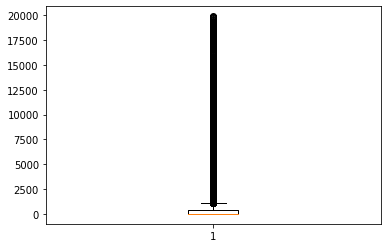

In [95]:
plt.boxplot(df["dst_bytes"])

In [96]:
# Convertir los datos categoricos a cuantitativo
le = LabelEncoder()
df['service'] = le.fit_transform(df['service'])
df['protocol_type'] = le.fit_transform(df['protocol_type'])
df['flag'] = le.fit_transform(df['flag'])
df['class'] = le.fit_transform(df['class'])

In [97]:
#Vemos como quedo ahora nuestro dataset
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


In [98]:
features = df.loc[:, df.columns != 'class']
target = df["class"]
scaler = MinMaxScaler()
scaler.fit(features)
features = pd.DataFrame(scaler.transform(features))
features

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0.0,0.5,0.292308,0.9,0.133062,0.000000,0.0,0.0,0.0,0.0,...,0.588235,0.098039,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0.0,1.0,0.630769,0.9,0.039566,0.000000,0.0,0.0,0.0,0.0,...,1.000000,0.003922,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0.0,0.5,0.707692,0.5,0.000000,0.000000,0.0,0.0,0.0,0.0,...,1.000000,0.101961,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0.0,0.5,0.338462,0.9,0.062873,0.409966,0.0,0.0,0.0,0.0,...,0.117647,1.000000,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0.0,0.5,0.338462,0.9,0.053930,0.021119,0.0,0.0,0.0,0.0,...,1.000000,1.000000,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24122,0.0,0.5,0.246154,0.2,0.000000,0.000000,0.0,0.0,0.0,0.0,...,1.000000,0.027451,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00
24123,0.0,0.5,0.292308,0.9,0.090515,0.000000,0.0,0.0,0.0,0.0,...,0.003922,0.152941,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00
24124,0.0,0.5,0.707692,0.1,0.000000,0.000000,0.0,0.0,0.0,0.0,...,1.000000,0.050980,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00
24125,0.0,0.5,0.584615,0.5,0.000000,0.000000,0.0,0.0,0.0,0.0,...,1.000000,0.078431,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00


In [99]:
# Dividimos el dataset en train y test
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=1234)

In [100]:
knn = KNeighborsClassifier()
knn.fit(features_train, target_train)

KNeighborsClassifier()

In [101]:
# Con esto luego vamos a testear overfit.
predict_train = knn.predict(features_train)
# Este es la accuracy del training
print(metrics.accuracy_score(predict_train, target_train))

0.9952629085741355


In [102]:
predict_test = knn.predict(features_test)
# Accuracy de test
print(metrics.accuracy_score(predict_test, target_test))

0.9944743749136621


In [103]:
# Ahora vamos a crear una matriz de confusion para ver tipos de errores
confusion_m = confusion_matrix(predict_test, target_test)

In [104]:
print(classification_report(predict_test, target_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3466
           1       0.99      0.99      0.99      3773

    accuracy                           0.99      7239
   macro avg       0.99      0.99      0.99      7239
weighted avg       0.99      0.99      0.99      7239



In [107]:
#Ahora utilizaremos PCA
pca = PCA(n_components=0.65, random_state=1234)
pca.fit(features_train)
pca.fit(features_test)
pca.n_components_

2

In [108]:
# Hacemos el transform utilizando train y test
features_trainPCA = pca.transform(features_train)
features_testPCA = pca.transform(features_test)

knn_PCA = KNeighborsClassifier()
knn_PCA.fit(features_trainPCA, target_train)

KNeighborsClassifier()

In [109]:
predict_train = knn_PCA.predict(features_trainPCA)
#accuracy train
print(metrics.accuracy_score(predict_train, target_train))

#accuracy test
predict_test = knn_PCA.predict(features_testPCA)
print(metrics.accuracy_score(predict_test, target_test))

0.9777356702984368
0.9669843901091311


In [110]:
#Creamos la matriz de confusion
confusion_m = confusion_matrix(predict_test, target_test)
print(classification_report(predict_test, target_test))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      3473
           1       0.97      0.97      0.97      3766

    accuracy                           0.97      7239
   macro avg       0.97      0.97      0.97      7239
weighted avg       0.97      0.97      0.97      7239



Text(0.5, 1.1, 'Confusion matrix')

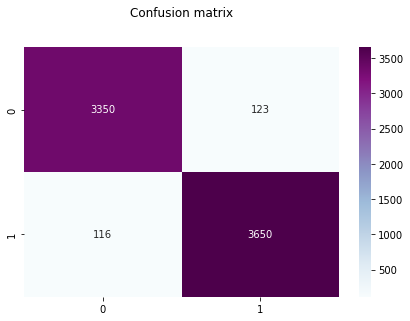

In [111]:
# Generar matriz de confusion
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
    
# create mapa de calor al lado
sn.heatmap(pd.DataFrame(confusion_m), annot=True, cmap="BuPu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)

# Resultados

El modelo PCA presento una mayor velocidad en cuando a calcular la prediccion, pero no tuvo la misma efectividad que el modelo Naive Byes. Dentro de la matriz de confusion que la diferencia entr los erroes de tipo 1 y 2 son unicamente 7 predicciones. Podemos ver que en recall y presion son de 0.97.


# Conclusiones

El modelo de PCA es mas eficiente en cuestion de el tiempo que le tomo el poder realizar la prediccion, en compraracion con el anterior. Sin embargo la eficiencia se sacrifico con cierto porcentaje de accuray, puesto que en este caso se redujo.

Podemos decir que es una herramienta que facilita mucho el procesamiento pero tiene su contra, que es la reduccion de la efectividad, pero dependiento de la cantidad de datos que se esta manejando puede que esto represente una ventaja sobre la accuracy. 
